In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from pandas.tseries.offsets import BDay

# 데이터를 불러옵니다.
kse = yf.Ticker("^KS11")
kospi = kse.history(start="2019-01-01", end="2024-10-31")

kospi.index = kospi.index.date
kospi.index = pd.to_datetime(kospi.index)
kospi=kospi.drop(columns=['Dividends','Stock Splits'])


In [47]:
kospi.head()

,Open,High,Low,Close,Volume
2019-01-02,2050.550049,2053.449951,2004.270020,2010.000000,326400
2019-01-03,2011.810059,2014.719971,1991.650024,1993.699951,428000
2019-01-04,1992.400024,2011.560059,1984.530029,2010.250000,409000
2019-01-07,2034.239990,2048.060059,2030.900024,2037.099976,440200
2019-01-08,2038.680054,2042.699951,2023.589966,2025.270020,397800


In [48]:
import pandas as pd

# 예시 데이터: kospi DataFrame의 'Volume' 컬럼 사용

# 거래량 값 기준으로 사분위수(25%, 50%, 75%)를 구해 4개 구간으로 나누기
quantiles = kospi['Volume'].quantile([0.25, 0.5, 0.75])

# 각 구간에 따라 Volume 값 분류 (0: 작음, 1: 조금 작음, 2: 약간 많음, 3: 많음)
def categorize_volume(volume):
    if volume <= quantiles[0.25]:
        return 0  # 거래량 작음
    elif volume <= quantiles[0.5]:
        return 1  # 조금 작음
    elif volume <= quantiles[0.75]:
        return 2  # 약간 많음
    else:
        return 3  # 많음

# 새로운 'Volume_Sector' 컬럼에 각 섹터 값 지정
kospi['Volume_Sector'] = kospi['Volume'].apply(categorize_volume)



In [49]:
kospi['Volume_MA_5'] = kospi['Volume'].rolling(window=5).mean()
# 이동 평균의 기울기(변화율) 계산 (shift 사용)
kospi['Volume_MA_slope_5'] = kospi['Volume_MA_5'].diff()


kospi['Volume_MA_20'] = kospi['Volume'].rolling(window=7).mean()
kospi['Volume_MA_slope_20'] = kospi['Volume_MA_20'].diff()


kospi['Volume_MA_60'] = kospi['Volume'].rolling(window=60).mean()
kospi['Volume_MA_slope_60'] = kospi['Volume_MA_60'].diff()


kospi['Volume_MA_240'] = kospi['Volume'].rolling(window=240).mean()
kospi['Volume_MA_slope_240'] = kospi['Volume_MA_240'].diff()


In [50]:
kospi['Close_MA_5'] = kospi['Close'].rolling(window=5).mean()
# 이동 평균의 기울기(변화율) 계산 (shift 사용)
kospi['Close_MA_slope_5'] = kospi['Close_MA_5'].diff()


kospi['Close_MA_20'] = kospi['Close'].rolling(window=7).mean()
kospi['Close_MA_slope_20'] = kospi['Close_MA_20'].diff()


kospi['Close_MA_60'] = kospi['Close'].rolling(window=60).mean()
kospi['Close_MA_slope_60'] = kospi['Close_MA_60'].diff()


kospi['Close_MA_240'] = kospi['Close'].rolling(window=240).mean()
kospi['Close_MA_slope_240'] = kospi['Close_MA_240'].diff()

In [51]:
window_length = 14  # RSI 기준 기간 설정

# 주가 변동 계산
delta = kospi['Close'].diff()

# 상승과 하락 분리
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

# 상승 평균과 하락 평균 계산
avg_gain = gain.rolling(window=window_length, min_periods=1).mean()
avg_loss = loss.rolling(window=window_length, min_periods=1).mean()

# RSI 계산
rs = avg_gain / avg_loss
kospi['RSI'] = 100 - (100 / (1 + rs))

def rsi_label(rsi):
    if rsi < 30:
        return 0  # 과매도 구간
    elif rsi <= 70:
        return 1  # 중립 구간
    else:
        return 2  # 과매수 구간

# 새로운 컬럼에 라벨링 값 할당
kospi['RSI_Label'] = kospi['RSI'].apply(rsi_label)

In [52]:
kospi=kospi.loc['2020-01-01':]

In [53]:
kospi.head()

,Open,High,Low,Close,Volume,Volume_Sector,Volume_MA_5,Volume_MA_slope_5,Volume_MA_20,Volume_MA_slope_20,...,Close_MA_5,Close_MA_slope_5,Close_MA_20,Close_MA_slope_20,Close_MA_60,Close_MA_slope_60,Close_MA_240,Close_MA_slope_240,RSI,RSI_Label
2020-01-02,2201.209961,2202.320068,2171.840088,2175.169922,494700,1,508520.0,-1460.0,527328.571429,-21200.000000,...,2193.011963,-5.708008,2196.135672,-3.055734,2117.930160,2.574666,2108.583505,0.466208,72.765366,2
2020-01-03,2192.580078,2203.379883,2165.389893,2176.459961,631600,2,520840.0,12320.0,525171.428571,-2157.142857,...,2190.287939,-2.724023,2192.175677,-3.959996,2120.508993,2.578833,2109.003880,0.420375,71.708748,2
2020-01-06,2154.969971,2164.419922,2149.949951,2155.070068,592700,2,525120.0,4280.0,538128.571429,12957.142857,...,2181.715967,-8.571973,2185.227121,-6.948556,2122.322660,1.813668,2109.381172,0.377292,55.797677,1
2020-01-07,2166.600098,2181.620117,2164.270020,2175.540039,568200,1,540720.0,15600.0,537871.428571,-257.142857,...,2175.981982,-5.733984,2183.149972,-2.077148,2124.779161,2.456500,2109.707672,0.326500,51.884056,1
2020-01-08,2156.270020,2162.320068,2137.719971,2151.310059,913800,3,640200.0,99480.0,586800.000000,48928.571429,...,2166.710010,-9.271973,2176.489990,-6.659982,2126.557495,1.778335,2109.896047,0.188375,44.819132,1


In [54]:
kospi['ud']=np.where(kospi['Close']-kospi['Open']>0,1,-1)

kospi['Close_ud']=np.where(kospi['Close']-kospi['Close'].shift(1) > 0,1,0)
kospi['daily_change_ratio'] = (kospi['Close'] - kospi['Open']) / kospi['Open']

In [55]:
kospi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1187 entries, 2020-01-02 to 2024-10-30
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Open                 1187 non-null   float64
 1   High                 1187 non-null   float64
 2   Low                  1187 non-null   float64
 3   Close                1187 non-null   float64
 4   Volume               1187 non-null   int64  
 5   Volume_Sector        1187 non-null   int64  
 6   Volume_MA_5          1187 non-null   float64
 7   Volume_MA_slope_5    1187 non-null   float64
 8   Volume_MA_20         1187 non-null   float64
 9   Volume_MA_slope_20   1187 non-null   float64
 10  Volume_MA_60         1187 non-null   float64
 11  Volume_MA_slope_60   1187 non-null   float64
 12  Volume_MA_240        1187 non-null   float64
 13  Volume_MA_slope_240  1187 non-null   float64
 14  Close_MA_5           1187 non-null   float64
 15  Close_MA_slope_5    

In [56]:
k_hammer_condition = (#(kospi['ct'].isnull() & 
    (kospi['ud'] == 1) &  # 양봉일 경우
    (kospi['Close'] - kospi['Open'] <= 0.4 * (kospi['High'] - kospi['Low'])) &  # 몸통이 짧아야 함
    (kospi['Close'] - kospi['Open'] >= 0.1 * (kospi['High'] - kospi['Low'])) &
    (kospi['High'] - kospi['Close'] <= 0.1 * (kospi['High'] - kospi['Low']))  # 아랫그림자가 길어야 함
) |(#(kospi['ct'].isnull()) &
    (kospi['ud'] == -1) &  # 음봉일 경우
    (kospi['Open'] - kospi['Close'] <= 0.4* (kospi['High'] - kospi['Low'])) &  # 몸통이 짧아야 함
    (kospi['Open'] - kospi['Close'] >= 0.1 * (kospi['High'] - kospi['Low'])) & 
    (kospi['High'] - kospi['Open'] <= 0.1 * (kospi['High'] - kospi['Low']))  # 아랫그림자가 길어야 함
)

kospi.loc[k_hammer_condition,'ct']=2


In [57]:
reverse_hammer_condition = (
    (kospi['ct'].isnull()) & 
    (kospi['ud'] == 1) &  # 양봉일 경우
    (kospi['Close'] - kospi['Open'] <= 0.4 * (kospi['High'] - kospi['Low'])) &  # 몸통이 짧아야 함
    (kospi['Close'] - kospi['Open'] >= 0.1 * (kospi['High'] - kospi['Low'])) &
    (kospi['Open'] - kospi['Low'] <= 0.1 * (kospi['High'] - kospi['Low']))   # 아랫그림자가 매우 짧아야 함
) | (
    (kospi['ct'].isnull()) &
    (kospi['ud'] == -1) &  # 음봉일 경우
    (kospi['Open'] - kospi['Close'] <= 0.4 * (kospi['High'] - kospi['Low'])) &  # 몸통이 짧아야 함
    (kospi['Open'] - kospi['Close'] >= 0.1 * (kospi['High'] - kospi['Low'])) & 
    (kospi['Close'] - kospi['Low'] <= 0.1 * (kospi['High'] - kospi['Low']))  # 아랫그림자가 매우 짧아야 함
)

# Reverse Hammer 패턴에 'ct' 값을 3으로 설정
kospi.loc[reverse_hammer_condition, 'ct'] = 3


In [58]:
engulfing_pattern_condition = (
    (kospi['ct'].isnull()) &  # 이미 다른 패턴으로 정의되지 않은 경우
    ((kospi['ud'] * kospi['ud'].shift(1) == -1)) &  # 반대 방향의 캔들 두 개 연속
    (np.abs(kospi['Open'] - kospi['Close']) > np.abs(kospi['Open'].shift(1) - kospi['Close'].shift(1))) &  # 두 번째 캔들의 몸통이 더 큼
    ((kospi['Open'] > kospi['Close'].shift(1)) & (kospi['Close'] < kospi['Open'].shift(1)) |  # 양봉이 음봉을 완전히 덮음
     (kospi['Open'] < kospi['Close'].shift(1)) & (kospi['Close'] > kospi['Open'].shift(1)))   # 음봉이 양봉을 완전히 덮음
)

# 장악형 패턴에 'ct' 값을 4로 설정
kospi.loc[engulfing_pattern_condition, 'ct'] = 4

In [59]:
long_candle_condition = (
    (kospi['ct'].isnull()) &
    (np.abs(kospi['Close'] - kospi['Open']) >= 0.8 * (kospi['High'] - kospi['Low'])) &  # 몸통이 변동폭의 80% 이상
    (np.abs(kospi['daily_change_ratio']) >= 0.004)  # 일일 등락 비율이 0.4% 이상
)

# 조건을 만족하는 경우 'ct' 값으로 설정 (예: 장대 캔들을 5로 표시)
kospi.loc[long_candle_condition, 'ct'] = 5

In [60]:
# 도지형 조건 정의 (다른 패턴에 속하지 않는 나머지)
doji_condition = kospi['ct'].isnull()

# 나머지 패턴에 도지형 'ct' 값을 1로 설정
kospi.loc[doji_condition, 'ct'] = 1

In [61]:
korea_1=kospi[kospi['ct']==5]

In [62]:
korea_1=kospi[kospi['ct']==5]
korea_1.head()

,Open,High,Low,Close,Volume,Volume_Sector,Volume_MA_5,Volume_MA_slope_5,Volume_MA_20,Volume_MA_slope_20,...,Close_MA_60,Close_MA_slope_60,Close_MA_240,Close_MA_slope_240,RSI,RSI_Label,ud,Close_ud,daily_change_ratio,ct
2020-01-02,2201.209961,2202.320068,2171.840088,2175.169922,494700,1,508520.0,-1460.0,527328.571429,-21200.000000,...,2117.930160,2.574666,2108.583505,0.466208,72.765366,2,-1,0,-0.011830,5.0
2020-01-10,2189.479980,2206.919922,2188.100098,2206.389893,594500,2,652360.0,-7420.0,626871.428571,25442.857143,...,2130.845329,2.303666,2110.568963,0.342124,53.074258,1,1,1,0.007723,5.0
2020-01-13,2204.489990,2230.429932,2204.489990,2229.260010,488300,1,631480.0,-20880.0,625957.142857,-914.285714,...,2133.285828,2.440499,2111.005004,0.436041,57.777574,1,1,1,0.011236,5.0
2020-01-31,2160.600098,2167.229980,2119.010010,2119.010010,710500,2,664720.0,20400.0,671771.428571,23571.428571,...,2160.226823,0.313501,2113.123835,-0.257167,39.046974,1,-1,0,-0.019249,5.0
2020-02-04,2121.219971,2162.320068,2120.530029,2157.899902,624600,2,693360.0,-36780.0,683557.142857,2300.000000,...,2160.291821,0.254333,2112.643960,-0.181584,38.270855,1,1,1,0.017292,5.0


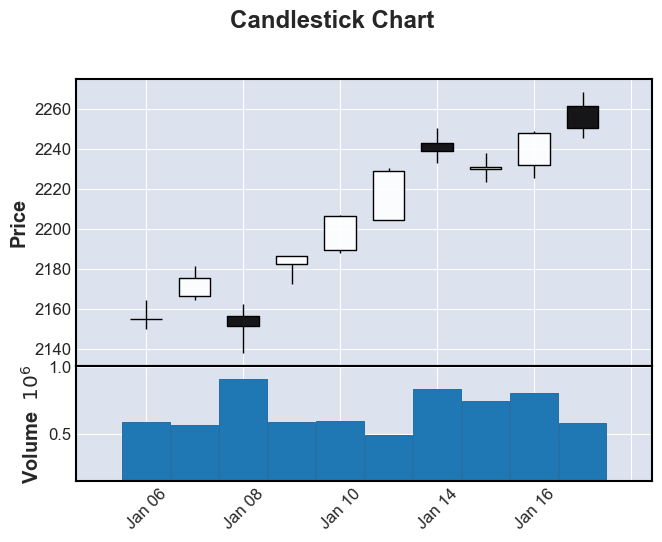

In [63]:
import pandas as pd
import mplfinance as mpf
import yfinance as yf

# 데이터 가져오기 (예시: 애플 주식 데이터)
ticker = yf.Ticker("^KS11")
data = ticker.history(start="2020-01-05", end="2020-01-20")

# 도지형 캔들 차트 그리기
mpf.plot(data, type='candle', volume=True, title='Candlestick Chart')

In [64]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


volume_data = kospi[['Volume']]

# 스케일링 (K-평균에 사용할 데이터의 스케일링을 위해)
scaler = StandardScaler()
scaled_volume_data = scaler.fit_transform(volume_data)

# K-평균 클러스터링 (4개의 클러스터)
kmeans = KMeans(n_clusters=4, random_state=42)
kospi['Volume_Cluster'] = kmeans.fit_predict(scaled_volume_data)

# 클러스터링 결과 해석 (0: 거래량 작음, 1: 조금 적음, 2: 약간 많음, 3: 많음)
cluster_labels = {0: "거래량 작음", 1: "조금 적음", 2: "약간 많음", 3: "많음"}
kospi['Volume_Cluster_Label'] = kospi['Volume_Cluster'].map(cluster_labels)

In [83]:
kospi.head()
kospi.to_csv("kospi.csv")

In [7]:
import pandas as pd
import numpy as np
import yfinance as yf
from pandas.tseries.offsets import BDay


sp = yf.Ticker("^GSPC")
snp = sp.history(start="2019-01-01", end="2024-10-31")

snp['Date_shifted'] = snp.index + BDay(1) #시차 간격 때문,영향을 보는것

snp.index = snp.index.date
snp.index = pd.to_datetime(snp.index)
snp=snp.drop(columns=['Dividends','Stock Splits'])

In [8]:
snp['Volume_MA_5'] = snp['Volume'].rolling(window=5).mean()
# 이동 평균의 기울기(변화율) 계산 (shift 사용)
snp['Volume_MA_slope_5'] = snp['Volume_MA_5'].diff()


snp['Volume_MA_20'] = snp['Volume'].rolling(window=7).mean()
snp['Volume_MA_slope_20'] = snp['Volume_MA_20'].diff()


snp['Volume_MA_60'] = snp['Volume'].rolling(window=60).mean()
snp['Volume_MA_slope_60'] = snp['Volume_MA_60'].diff()


snp['Volume_MA_240'] = snp['Volume'].rolling(window=240).mean()
snp['Volume_MA_slope_240'] = snp['Volume_MA_240'].diff()


In [9]:
snp['Close_MA_5'] = snp['Close'].rolling(window=5).mean()
# 이동 평균의 기울기(변화율) 계산 (shift 사용)
snp['Close_MA_slope_5'] = snp['Close_MA_5'].diff()


snp['Close_MA_20'] = snp['Close'].rolling(window=7).mean()
snp['Close_MA_slope_20'] = snp['Close_MA_20'].diff()


snp['Close_MA_60'] = snp['Close'].rolling(window=60).mean()
snp['Close_MA_slope_60'] = snp['Close_MA_60'].diff()


snp['Close_MA_240'] = snp['Close'].rolling(window=240).mean()
snp['Close_MA_slope_240'] = snp['Close_MA_240'].diff()

In [10]:
window_length = 14  # RSI 기준 기간 설정

# 주가 변동 계산
delta = snp['Close'].diff()

# 상승과 하락 분리
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

# 상승 평균과 하락 평균 계산
avg_gain = gain.rolling(window=window_length, min_periods=1).mean()
avg_loss = loss.rolling(window=window_length, min_periods=1).mean()

# RSI 계산
rs = avg_gain / avg_loss
snp['RSI'] = 100 - (100 / (1 + rs))

def rsi_label(rsi):
    if rsi < 30:
        return 0  # 과매도 구간
    elif rsi <= 70:
        return 1  # 중립 구간
    else:
        return 2  # 과매수 구간

# 새로운 컬럼에 라벨링 값 할당
snp['RSI_Label'] = snp['RSI'].apply(rsi_label)

In [11]:
snp.head()

,Open,High,Low,Close,Volume,Date_shifted,Volume_MA_5,Volume_MA_slope_5,Volume_MA_20,Volume_MA_slope_20,...,Close_MA_5,Close_MA_slope_5,Close_MA_20,Close_MA_slope_20,Close_MA_60,Close_MA_slope_60,Close_MA_240,Close_MA_slope_240,RSI,RSI_Label
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,3733160000,2019-01-03 00:00:00-05:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,3858830000,2019-01-04 00:00:00-05:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,4234140000,2019-01-07 00:00:00-05:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.493633,1
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,4133120000,2019-01-08 00:00:00-05:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.095848,1
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,4120060000,2019-01-09 00:00:00-05:00,4.015862e+09,NaN,NaN,NaN,...,2522.791943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.062395,1


In [12]:
snp['ud']=np.where(snp['Close']-snp['Open']>0,1,-1)

In [13]:
snp['Close_ud']= np.where(snp['Close']-snp['Close'].shift(1) > 0,1,0)
snp['daily_change_ratio'] = (snp['Close'] - snp['Open']) / snp['Open']

In [14]:
snp.head()

,Open,High,Low,Close,Volume,Date_shifted,Volume_MA_5,Volume_MA_slope_5,Volume_MA_20,Volume_MA_slope_20,...,Close_MA_slope_20,Close_MA_60,Close_MA_slope_60,Close_MA_240,Close_MA_slope_240,RSI,RSI_Label,ud,Close_ud,daily_change_ratio
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,3733160000,2019-01-03 00:00:00-05:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0,0.013351
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,3858830000,2019-01-04 00:00:00-05:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0,-1,0,-0.017669
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,4234140000,2019-01-07 00:00:00-05:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,57.493633,1,1,1,0.023283
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,4133120000,2019-01-08 00:00:00-05:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,62.095848,1,1,1,0.005553
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,4120060000,2019-01-09 00:00:00-05:00,4.015862e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,67.062395,1,1,1,0.002453


In [16]:
snp.reset_index(inplace=True)
snp.head()


,index,Open,High,Low,Close,Volume,Date_shifted,Volume_MA_5,Volume_MA_slope_5,Volume_MA_20,...,Close_MA_slope_20,Close_MA_60,Close_MA_slope_60,Close_MA_240,Close_MA_slope_240,RSI,RSI_Label,ud,Close_ud,daily_change_ratio
0,2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,3733160000,2019-01-03 00:00:00-05:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0,0.013351
1,2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,3858830000,2019-01-04 00:00:00-05:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0,-1,0,-0.017669
2,2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,4234140000,2019-01-07 00:00:00-05:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,57.493633,1,1,1,0.023283
3,2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,4133120000,2019-01-08 00:00:00-05:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,62.095848,1,1,1,0.005553
4,2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,4120060000,2019-01-09 00:00:00-05:00,4.015862e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,67.062395,1,1,1,0.002453


In [17]:
snp.rename(columns={'index': 'Date'}, inplace=True)

In [19]:
snp.to_csv("snp.csv",index=True)

In [18]:
snp.head()

,Date,Open,High,Low,Close,Volume,Date_shifted,Volume_MA_5,Volume_MA_slope_5,Volume_MA_20,...,Close_MA_slope_20,Close_MA_60,Close_MA_slope_60,Close_MA_240,Close_MA_slope_240,RSI,RSI_Label,ud,Close_ud,daily_change_ratio
0,2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,3733160000,2019-01-03 00:00:00-05:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0,0.013351
1,2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,3858830000,2019-01-04 00:00:00-05:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0,-1,0,-0.017669
2,2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,4234140000,2019-01-07 00:00:00-05:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,57.493633,1,1,1,0.023283
3,2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,4133120000,2019-01-08 00:00:00-05:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,62.095848,1,1,1,0.005553
4,2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,4120060000,2019-01-09 00:00:00-05:00,4.015862e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,67.062395,1,1,1,0.002453


In [ ]:
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# ChromeDriver를 WebDriver Manager로 자동 설치 및 설정
options = webdriver.ChromeOptions()
options.add_argument('--headless')  # 브라우저를 열지 않고 실행
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# Investing.com의 한국 CPI 데이터 페이지로 이동
url = "https://investing.com/economic-calendar/cpi-733"
driver.get(url)
time.sleep(5)  # 페이지 로딩을 위해 잠시 대기

# "Show More" 버튼을 9번 클릭하여 모든 데이터 로드
for i in range(11):
    try:
        # WebDriverWait를 사용해 버튼이 로드될 때까지 대기
        show_more_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.CLASS_NAME, "showMoreReplies"))
        )
        show_more_button.click()
        print(f"Clicked 'Show More' button {i + 1} times.")
        time.sleep(2)  # 데이터 로딩을 위해 잠시 대기
    except Exception as e:
        print("Error clicking 'Show More' button:", e)
        break

# 페이지 소스 가져오기
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# 테이블 데이터 찾기
table = soup.find('table', {'class': 'genTbl openTbl ecHistoryTbl'})
if table:
    rows = table.find_all('tr')
    
    # 데이터 저장
    data = []
    for row in rows[1:]:  # 첫 번째 행은 헤더일 가능성이 높음
        cols = row.find_all('td')
        if len(cols) >= 4:  # 데이터 열이 충분히 있는 경우
            release_date = cols[0].text.strip()
            time_data = cols[1].text.strip()
            actual = cols[2].text.strip()
            forecast = cols[3].text.strip()
            previous = cols[4].text.strip()
            data.append([release_date, time_data, actual, forecast, previous])

    # DataFrame으로 변환
    cpi1 = pd.DataFrame(data, columns=['Release Date', 'Time', 'Actual', 'Forecast', 'Previous'])
    print()
else:
    print("테이블을 찾을 수 없습니다.")

# 드라이버 종료
driver.quit()


Clicked 'Show More' button 1 times.
Clicked 'Show More' button 2 times.
Clicked 'Show More' button 3 times.
Clicked 'Show More' button 4 times.
Clicked 'Show More' button 5 times.
Clicked 'Show More' button 6 times.
Clicked 'Show More' button 7 times.
Clicked 'Show More' button 8 times.
Clicked 'Show More' button 9 times.
Clicked 'Show More' button 10 times.
Clicked 'Show More' button 11 times.



In [ ]:
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# ChromeDriver를 WebDriver Manager로 자동 설치 및 설정
options = webdriver.ChromeOptions()
options.add_argument('--headless')  # 브라우저를 열지 않고 실행
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# Investing.com의 한국 CPI 데이터 페이지로 이동
url = "https://investing.com/economic-calendar/ism-manufacturing-pmi-173"
driver.get(url)
time.sleep(5)  # 페이지 로딩을 위해 잠시 대기

# "Show More" 버튼을 9번 클릭하여 모든 데이터 로드
for i in range(11):
    try:
        # WebDriverWait를 사용해 버튼이 로드될 때까지 대기
        show_more_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.CLASS_NAME, "showMoreReplies"))
        )
        show_more_button.click()
        print(f"Clicked 'Show More' button {i + 1} times.")
        time.sleep(2)  # 데이터 로딩을 위해 잠시 대기
    except Exception as e:
        print("Error clicking 'Show More' button:", e)
        break

# 페이지 소스 가져오기
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# 테이블 데이터 찾기
table = soup.find('table', {'class': 'genTbl openTbl ecHistoryTbl'})
if table:
    rows = table.find_all('tr')
    
    # 데이터 저장
    data = []
    for row in rows[1:]:  # 첫 번째 행은 헤더일 가능성이 높음
        cols = row.find_all('td')
        if len(cols) >= 4:  # 데이터 열이 충분히 있는 경우
            release_date = cols[0].text.strip()
            time_data = cols[1].text.strip()
            actual = cols[2].text.strip()
            forecast = cols[3].text.strip()
            previous = cols[4].text.strip()
            data.append([release_date, time_data, actual, forecast, previous])

    # DataFrame으로 변환
    pmi1 = pd.DataFrame(data, columns=['Release Date', 'Time', 'Actual', 'Forecast', 'Previous'])
else:
    print("테이블을 찾을 수 없습니다.")

# 드라이버 종료
driver.quit()

Clicked 'Show More' button 1 times.
Clicked 'Show More' button 2 times.
Clicked 'Show More' button 3 times.
Clicked 'Show More' button 4 times.
Clicked 'Show More' button 5 times.
Clicked 'Show More' button 6 times.
Clicked 'Show More' button 7 times.
Clicked 'Show More' button 8 times.
Clicked 'Show More' button 9 times.
Clicked 'Show More' button 10 times.
Clicked 'Show More' button 11 times.


In [6]:
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# ChromeDriver를 WebDriver Manager로 자동 설치 및 설정
options = webdriver.ChromeOptions()
options.add_argument('--headless')  # 브라우저를 열지 않고 실행
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# Investing.com의 CPI 데이터 페이지로 이동
url = "https://www.investing.com/economic-calendar/interest-rate-decision-168"
driver.get(url)
time.sleep(5)  # 페이지 로딩을 위해 잠시 대기

# "Show More" 버튼을 9번 클릭하여 모든 데이터 로드
for i in range(10):
    try:
        # WebDriverWait를 사용해 버튼이 로드될 때까지 대기
        show_more_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.CLASS_NAME, "showMoreReplies"))
        )
        show_more_button.click()
        print(f"Clicked 'Show More' button {i + 1} times.")
        time.sleep(2)  # 데이터 로딩을 위해 잠시 대기
    except Exception as e:
        print("Error clicking 'Show More' button:", e)
        break

# 페이지 소스 가져오기
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# 테이블 데이터 찾기
table = soup.find('table', {'class': 'genTbl openTbl ecHistoryTbl'})
if table:
    rows = table.find_all('tr')
    
    # 데이터 저장
    data = []
    for row in rows[1:]:  # 첫 번째 행은 헤더일 가능성이 높음
        cols = row.find_all('td')
        if len(cols) >= 4:  # 데이터 열이 충분히 있는 경우
            release_date = cols[0].text.strip()
            time_data = cols[1].text.strip()
            actual = cols[2].text.strip()
            forecast = cols[3].text.strip()
            previous = cols[4].text.strip()
            data.append([release_date, time_data, actual, forecast, previous])

    # DataFrame으로 변환
    rate1 = pd.DataFrame(data, columns=['Release Date', 'Time', 'Actual', 'Forecast', 'Previous'])
else:
    print("테이블을 찾을 수 없습니다.")

# 드라이버 종료
driver.quit()


Clicked 'Show More' button 1 times.
Clicked 'Show More' button 2 times.
Clicked 'Show More' button 3 times.
Clicked 'Show More' button 4 times.
Clicked 'Show More' button 5 times.
Clicked 'Show More' button 6 times.
Clicked 'Show More' button 7 times.
Clicked 'Show More' button 8 times.
Clicked 'Show More' button 9 times.
Clicked 'Show More' button 10 times.


In [49]:
cpi=cpi1.copy()
pmi=pmi1.copy()
rate=rate1.copy()

In [57]:
pmi.tail()

,Time,Actual,Forecast,Previous
Release Date,,,,
2019-05-01,09:00,52.8,55.0,55.3
2019-04-01,09:00,55.3,54.5,54.2
2019-03-01,10:00,54.2,55.5,56.6
2019-02-01,10:00,56.6,54.2,54.3
2019-01-03,10:00,54.1,57.7,59.3


In [18]:
rate=rate1.copy()

In [50]:
cpi.tail()

,Release Date,Time,Actual,Forecast,Previous
67,"May 10, 2019 (Apr)",07:30,2.0%,2.1%,1.9%
68,"Apr 10, 2019 (Mar)",07:30,1.9%,1.8%,1.5%
69,"Mar 12, 2019 (Feb)",07:30,1.5%,1.6%,1.6%
70,"Feb 13, 2019 (Jan)",08:30,1.6%,1.5%,1.9%
71,"Jan 11, 2019 (Dec)",08:30,1.9%,1.9%,2.2%


In [84]:
rate.head()

,Release Date,Time,Actual,Forecast,Previous
0,"Dec 18, 2024",14:00,,,4.75%
1,"Nov 07, 2024",14:00,4.75%,4.75%,5.00%
2,"Sep 18, 2024",13:00,5.00%,5.25%,5.50%
3,"Jul 31, 2024",13:00,5.50%,5.50%,5.50%
4,"Jun 12, 2024",13:00,5.50%,5.50%,5.50%


In [51]:
cpi['Release Date'] = cpi['Release Date'].str.replace(r'\s*\(.*?\)', '', regex=True)


# 'Release Date'를 datetime 형식으로 변환
cpi['Release Date'] = pd.to_datetime(cpi['Release Date'], format='%b %d, %Y')

# 'Release Date'를 YYYY-MM-DD 형식으로 변환
cpi['Release Date'] = cpi['Release Date'].dt.strftime('%Y-%m-%d')

# 'Release Date' 열을 인덱스로 설정
cpi.set_index('Release Date', inplace=True)

cpi=cpi.loc['2024-10-31':] #10월 까지의 데이터만 보기 위해
# 데이터 확인
print(cpi.head())



               Time Actual Forecast Previous
Release Date                                
2024-10-10    07:30   2.4%     2.3%     2.5%
2024-09-11    07:30   2.5%     2.5%     2.9%
2024-08-14    07:30   2.9%     3.0%     3.0%
2024-07-11    07:30   3.0%     3.1%     3.3%
2024-06-12    07:30   3.3%     3.4%     3.4%


In [52]:
pmi['Release Date'] = pmi['Release Date'].str.replace(r'\s*\(.*?\)', '', regex=True)


# 'Release Date'를 datetime 형식으로 변환
pmi['Release Date'] = pd.to_datetime(pmi['Release Date'], format='%b %d, %Y')

# 'Release Date'를 YYYY-MM-DD 형식으로 변환
pmi['Release Date'] = pmi['Release Date'].dt.strftime('%Y-%m-%d')

# 'Release Date' 열을 인덱스로 설정
pmi.set_index('Release Date', inplace=True)

pmi=pmi.loc['2024-10-31':]
# 데이터 확인
print(pmi.head())

               Time Actual Forecast Previous
Release Date                                
2024-10-01    09:00   47.2     47.6     47.2
2024-09-03    09:00   47.2     47.5     46.8
2024-08-01    09:00   46.8     48.8     48.5
2024-07-01    09:00   48.5     49.2     48.7
2024-06-03    09:00   48.7     49.8     49.2


In [53]:
# 'Release Date' 열을 datetime 형식으로 변환
rate['Release Date'] = pd.to_datetime(rate['Release Date'], format='%b %d, %Y')

# 'Release Date'를 YYYY-MM-DD 형식으로 변환
rate['Release Date'] = rate['Release Date'].dt.strftime('%Y-%m-%d')

# 'Release Date' 열을 인덱스로 설정
rate.set_index('Release Date', inplace=True)

rate=rate.loc['2024-10-31':]
# 데이터 확인
print(rate.head())

KeyError: 'Release Date'

In [60]:
pmi.tail()

,Time,Actual,Forecast,Previous
Release Date,,,,
2019-05-01,09:00,52.8,55.0,55.3
2019-04-01,09:00,55.3,54.5,54.2
2019-03-01,10:00,54.2,55.5,56.6
2019-02-01,10:00,56.6,54.2,54.3
2019-01-03,10:00,54.1,57.7,59.3


In [61]:
import pandas as pd

# 가정: 데이터프레임 이름이 cpi_df이며, 'Actual'과 'Forecast' 열이 %가 포함된 문자열 형식임
#cpi['Actual'] = cpi['Actual'].replace('', pd.NA)
#cpi['Forecast'] = cpi['Forecast'].replace('', pd.NA)
# %를 제거하고 실수형으로 변환
cpi['Actual'] = cpi['Actual'].str.rstrip('%').astype(float)
cpi['Forecast'] = cpi['Forecast'].str.rstrip('%').astype(float)
cpi['Previous'] =cpi ['Previous'].str.rstrip('%').astype(float)

# 조건에 따른 레이블링 함수
def label_cpi(row):
    # 예측 대비 성과를 기준으로 0, 1, 2 할당
    if row['Actual'] < row['Forecast']:
        pred_label = 0  # 예측보다 낮음
    elif row['Actual'] == row['Forecast']:
        pred_label = 1  # 예측과 같음
    else:
        pred_label = 2  # 예측보다 높음

    # CPI YoY가 3% 이상인지 여부를 기준으로 0 또는 3 할당
    cpi_label = 0 if row['Actual'] >= 3 else 3

    # 두 값을 더해 최종 레이블 생성
    return pred_label + cpi_label

# 레이블 열 생성
cpi['Label'] = cpi.apply(label_cpi, axis=1)



In [62]:
cpi.head()

,Time,Actual,Forecast,Previous,Label
Release Date,,,,,
2024-10-10,07:30,2.4,2.3,2.5,5
2024-09-11,07:30,2.5,2.5,2.9,4
2024-08-14,07:30,2.9,3.0,3.0,3
2024-07-11,07:30,3.0,3.1,3.3,0
2024-06-12,07:30,3.3,3.4,3.4,0


In [63]:
import pandas as pd


# %를 제거하고 실수형으로 변환
pmi['Actual'] = pmi['Actual'].str.rstrip('%').astype(float)
pmi['Forecast'] = pmi['Forecast'].str.rstrip('%').astype(float)
pmi['Previous'] = pmi['Previous'].str.rstrip('%').astype(float)

# 조건에 따른 레이블링 함수
def label_cpi(row):
    # 예측 대비 성과를 기준으로 0, 1, 2 할당
    if row['Actual'] > row['Forecast']:
        pred_label = 0  # 예측보다 낮음
    elif row['Actual'] == row['Forecast']:
        pred_label = 1  # 예측과 같음
    else:
        pred_label = 2  # 예측보다 높음

    # pmi 지수가 50보다 낮냐 높냐
    pmi_label = 0 if row['Actual'] >= 50 else 3

    # 두 값을 더해 최종 레이블 생성
    return pred_label + pmi_label

# 레이블 열 생성
pmi['Label'] = pmi.apply(label_cpi, axis=1)



In [17]:
rate

,Time,Actual,Forecast,Previous,Label
Release Date,,,,,
2024-09-18,13:00,5.00,5.25,5.50,4
2024-07-31,13:00,5.50,5.5,5.50,2
2024-06-12,13:00,5.50,5.5,5.50,2
2024-05-01,13:00,5.50,5.5,5.50,2
2024-03-20,13:00,5.50,5.5,5.50,2
...,...,...,...,...,...
2017-06-14,13:00,1.25,1.25,1.00,6
2017-05-03,13:00,1.00,1.0,1.00,7
2017-03-15,13:00,1.00,1.0,0.75,6


In [20]:
import pandas as pd

# 가정: 금리 데이터가 이미 'rate'라는 이름의 데이터프레임에 있으며,
# 'Actual' 열이 %가 포함된 문자열 형식임
rate['Forecast'] = rate['Forecast'].replace('', pd.NA)
# %를 제거하고 실수형으로 변환
rate['Actual'] = rate['Actual'].str.rstrip('%').astype(float)
rate['Previous'] = rate['Previous'].str.rstrip('%').astype(float)
# null이 아닌 경우만 '%' 제거하고 float로 변환
rate['Forecast'] = rate['Forecast'].apply(
    lambda x: float(x.rstrip('%')) if pd.notnull(x) else x
)

#조건에 따른 레이블링 함수
def label_rate(row):
    # 금리가 3 이상인지 여부에 따라 0 또는 5 할당
    rate_label = 0 if row['Actual'] >= 3 else 5
    
    # 전월 대비 금리 변동에 따른 레이블 할당
    change = row['Actual'] - row['Previous']
    if change >= 0.5:
        change_label = 0
    elif change == 0.25:
        change_label = 1
    elif change == 0:
        change_label = 2
    elif change == -0.25:
        change_label = 3
    elif change <= -0.5:
        change_label = 4
    else:
        change_label = None  # 예상치 못한 경우 (필요시 처리 방법 추가 가능)
    
    # 최종 레이블 생성
    return rate_label + change_label

# 이전 값을 기준으로 레이블링 열 추가
rate['Label'] = rate.apply(label_rate, axis=1)



In [64]:
cpi.head()

,Time,Actual,Forecast,Previous,Label
Release Date,,,,,
2024-10-10,07:30,2.4,2.3,2.5,5
2024-09-11,07:30,2.5,2.5,2.9,4
2024-08-14,07:30,2.9,3.0,3.0,3
2024-07-11,07:30,3.0,3.1,3.3,0
2024-06-12,07:30,3.3,3.4,3.4,0


In [65]:
cpi.drop('Time',axis=1,inplace=True)
pmi.drop('Time',axis=1,inplace=True)


In [67]:
cpi.reset_index(inplace=True)
pmi.reset_index(inplace=True)

In [71]:
cpi=cpi.rename(columns={'Release Date':'Date'})

In [70]:
pmi=pmi.rename(columns={'Release Date':'Date'})

In [72]:
cpi=cpi.drop('Time_cpi',axis=1)
pmi=pmi.drop('Time_pmi',axis=1)
rate=rate.drop('Time_rate',axis=1)

KeyError: "['Time_cpi'] not found in axis"

In [75]:
rate.to_csv('rate.csv')
cpi.to_csv('cpi.csv')
pmi.to_csv('pmi.csv')

In [74]:
cpi

,Date,Actual,Forecast,Previous,Label
0,2024-10-10,2.4,2.3,2.5,5
1,2024-09-11,2.5,2.5,2.9,4
2,2024-08-14,2.9,3.0,3.0,3
3,2024-07-11,3.0,3.1,3.3,0
4,2024-06-12,3.3,3.4,3.4,0
...,...,...,...,...,...
65,2019-05-10,2.0,2.1,1.9,3
66,2019-04-10,1.9,1.8,1.5,5
67,2019-03-12,1.5,1.6,1.6,3
68,2019-02-13,1.6,1.5,1.9,5


In [1]:
import pandas as pd
import numpy as np

rate1 = pd.read_csv('/Users/jiwon/bdata/cscfiles/rate.csv')
cpi1 = pd.read_csv('/Users/jiwon/bdata/cscfiles/cpi.csv')
pmi1= pd.read_csv('/Users/jiwon/bdata/cscfiles/pmi.csv')

snp1= pd.read_csv('/Users/jiwon/bdata/cscfiles/snp.csv')
kospi1= pd.read_csv('/Users/jiwon/bdata/cscfiles/kospi.csv')

In [2]:
rate=rate1.copy()
cpi=cpi1.copy()
pmi=pmi1.copy()

snp=snp1.copy()
kospi=kospi1.copy()

In [76]:
cpi['Date']=pd.to_datetime(cpi['Date'])
pmi['Date']=pd.to_datetime(pmi['Date'])
rate['Date']=pd.to_datetime(rate['Date'])

snp['Date']=pd.to_datetime(snp['Date'])

In [84]:
cpi.set_index('Date',inplace=True)
pmi.set_index('Date',inplace=True)

In [86]:
cpi.columns = [f"{col}_cpi" for col in cpi.columns]
pmi.columns = [f"{col}_pmi" for col in pmi.columns]

In [88]:
pmi.reset_index(inplace=True)
cpi.reset_index(inplace=True)

In [89]:
cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          70 non-null     datetime64[ns]
 1   Actual_cpi    70 non-null     float64       
 2   Forecast_cpi  70 non-null     float64       
 3   Previous_cpi  70 non-null     float64       
 4   Label_cpi     70 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 2.9 KB


In [90]:
merged_snp=pd.merge(left = snp , right = rate, how = "left", on = 'Date')

merged_snp=pd.merge(left = merged_snp , right = pmi, how = "left", on = 'Date')

merged_snp=pd.merge(left = merged_snp , right = cpi, how = "left", on = 'Date')


In [91]:
merged_snp

,Date,Open,High,Low,Close,Volume,Date_shifted,Volume_MA_5,Volume_MA_slope_5,Volume_MA_20,...,Previous_rate,Label_rate,Actual_pmi,Forecast_pmi,Previous_pmi,Label_pmi,Actual_cpi,Forecast_cpi,Previous_cpi,Label_cpi
0,2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,3733160000,2019-01-03 00:00:00-05:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,3858830000,2019-01-04 00:00:00-05:00,NaN,NaN,NaN,...,NaN,NaN,54.1,57.7,59.3,2.0,NaN,NaN,NaN,NaN
2,2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,4234140000,2019-01-07 00:00:00-05:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,4133120000,2019-01-08 00:00:00-05:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,4120060000,2019-01-09 00:00:00-05:00,4.015862e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,2024-10-24,5817.799805,5817.799805,5784.919922,5809.859863,3543030000,2024-10-25 00:00:00-04:00,3.439852e+09,12604000.0,3.449500e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1464,2024-10-25,5826.750000,5862.819824,5799.979980,5808.120117,3501280000,2024-10-28 00:00:00-04:00,3.465210e+09,25358000.0,3.454364e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1465,2024-10-28,5833.930176,5842.919922,5823.080078,5823.520020,3691280000,2024-10-29 00:00:00-04:00,3.522064e+09,56854000.0,3.484546e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1466,2024-10-29,5819.680176,5847.189941,5802.169922,5832.919922,3879100000,2024-10-30 00:00:00-04:00,3.629468e+09,107404000.0,3.556633e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
cpi_has= merged_snp['Actual_cpi'].notnull()
pmi_has= merged_snp['Actual_pmi'].notnull()
rate_has= merged_snp['Actual_rate'].notnull()
merged_snp.loc[cpi_has,'Event']=1
merged_snp.loc[pmi_has,'Event']=2
merged_snp.loc[rate_has,'Event']=3

In [93]:
merged_snp.loc[merged_snp['Event']>=1]

,Date,Open,High,Low,Close,Volume,Date_shifted,Volume_MA_5,Volume_MA_slope_5,Volume_MA_20,...,Label_rate,Actual_pmi,Forecast_pmi,Previous_pmi,Label_pmi,Actual_cpi,Forecast_cpi,Previous_cpi,Label_cpi,Event
1,2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,3858830000,2019-01-04 00:00:00-05:00,NaN,NaN,NaN,...,NaN,54.1,57.7,59.3,2.0,NaN,NaN,NaN,NaN,2.0
7,2019-01-11,2588.110107,2596.270020,2577.399902,2596.260010,3447460000,2019-01-14 00:00:00-05:00,3.902136e+09,-157336000.0,3.943379e+09,...,NaN,NaN,NaN,NaN,NaN,1.9,1.9,2.2,4.0,1.0
19,2019-01-30,2653.620117,2690.439941,2648.340088,2681.050049,3883270000,2019-01-31 00:00:00-05:00,3.660478e+09,104900000.0,3.655016e+09,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
21,2019-02-01,2702.320068,2716.659912,2696.879883,2706.530029,3782490000,2019-02-04 00:00:00-05:00,3.953690e+09,-7702000.0,3.862669e+09,...,NaN,56.6,54.2,54.3,0.0,NaN,NaN,NaN,NaN,2.0
29,2019-02-13,2750.300049,2761.850098,2748.629883,2753.030029,3684910000,2019-02-14 00:00:00-05:00,3.737362e+09,39664000.0,3.681574e+09,...,NaN,NaN,NaN,NaN,NaN,1.6,1.5,1.9,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,2024-09-03,5623.890137,5623.890137,5504.330078,5528.930176,3866350000,2024-09-04 00:00:00-04:00,3.394056e+09,185556000.0,3.314399e+09,...,NaN,47.2,47.5,46.8,5.0,NaN,NaN,NaN,NaN,2.0
1432,2024-09-11,5496.419922,5560.410156,5406.959961,5554.129883,3839450000,2024-09-12 00:00:00-04:00,3.771604e+09,72262000.0,3.743216e+09,...,NaN,NaN,NaN,NaN,NaN,2.5,2.5,2.9,4.0,1.0
1437,2024-09-18,5641.680176,5689.750000,5615.080078,5618.259766,3691390000,2024-09-19 00:00:00-04:00,3.545584e+09,-29612000.0,3.630793e+09,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1446,2024-10-01,5757.729980,5757.729980,5681.279785,5708.750000,4025180000,2024-10-02 00:00:00-04:00,4.073106e+09,30494000.0,3.966827e+09,...,NaN,47.2,47.6,47.2,5.0,NaN,NaN,NaN,NaN,2.0


In [94]:
merged_snp['Actual_rate'].fillna(method='ffill', inplace=True)
merged_snp['Actual_pmi'].fillna(method='ffill', inplace=True)
merged_snp['Actual_cpi'].fillna(method='ffill', inplace=True)


/var/folders/mv/kwm2lnj57ys03y_sg71d63f40000gn/T/ipykernel_14361/1685753126.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_snp['Actual_rate'].fillna(method='ffill', inplace=True)
/var/folders/mv/kwm2lnj57ys03y_sg71d63f40000gn/T/ipykernel_14361/1685753126.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_snp['Actual_rate'].fillna(method='ffill', inplace=True)
/var/folders/mv/kwm2lnj57ys03y_sg71d63f40000gn/T/ipykernel_14

In [95]:
merged_snp['Label_rate'].fillna(method='ffill', inplace=True)
merged_snp['Label_pmi'].fillna(method='ffill', inplace=True)
merged_snp['Label_cpi'].fillna(method='ffill', inplace=True)

/var/folders/mv/kwm2lnj57ys03y_sg71d63f40000gn/T/ipykernel_14361/412045594.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_snp['Label_rate'].fillna(method='ffill', inplace=True)
/var/folders/mv/kwm2lnj57ys03y_sg71d63f40000gn/T/ipykernel_14361/412045594.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_snp['Label_rate'].fillna(method='ffill', inplace=True)
/var/folders/mv/kwm2lnj57ys03y_sg71d63f40000gn/T/ipykernel_14361/

In [100]:
merged_rate=merged_snp['Label_rate']<=4  #고금리
merged_pmi=merged_snp['Label_pmi']<=2 #경기 좋음 (pmi>=50)
merged_cpi=merged_snp['Label_cpi']<=2 #물가 높음(cpi>=3.0)

print("merged_rate 조건 결과:\n", merged_rate)
print("merged_pmi 조건 결과:\n", merged_pmi)
print("merged_cpi 조건 결과:\n", merged_cpi)

merged_snp.loc[~merged_rate & merged_pmi & ~merged_cpi,'Season']=1 #봄 금리 낮고, 경기 좋고, 물가 낮고
merged_snp.loc[~merged_rate & merged_pmi & merged_cpi,'Season']=2 #   금리 낮고 , 경기 좋고 ,물가는 비싸지고
merged_snp.loc[merged_rate & merged_pmi& merged_cpi,'Season']=3 #여름 금리 높아지고, 경기 좋고,물가 비싸지고
merged_snp.loc[merged_rate & ~merged_pmi & merged_cpi,'Season']=4  #가을 금리 높고, 경기 나빠지고 , 물가 비싸고
merged_snp.loc[merged_rate & ~merged_pmi & ~merged_cpi,'Season']=5 #금리 높고, 경기 나쁘고, 물가 낮아지고
merged_snp.loc[~merged_rate & ~merged_pmi & ~merged_cpi,'Season']=6 #겨울 금리 낮아지고, 경기 나쁘고, 물가 낮아지고

merged_snp.loc[merged_rate & merged_pmi & ~merged_cpi,'Season']=7 #금리 높고, 경기 좋고, 물가 낮고
merged_snp.loc[~merged_rate & ~merged_pmi & merged_cpi,'Season']=8 #금리 낮아고, 경기 나쁘고, 물가 높고


merged_rate 조건 결과:
 Date
2019-01-02    False
2019-01-03    False
2019-01-04    False
2019-01-07    False
2019-01-08    False
              ...  
2024-10-24     True
2024-10-25     True
2024-10-28     True
2024-10-29     True
2024-10-30     True
Name: Label_rate, Length: 1468, dtype: bool
merged_pmi 조건 결과:
 Date
2019-01-02    False
2019-01-03     True
2019-01-04     True
2019-01-07     True
2019-01-08     True
              ...  
2024-10-24    False
2024-10-25    False
2024-10-28    False
2024-10-29    False
2024-10-30    False
Name: Label_pmi, Length: 1468, dtype: bool
merged_cpi 조건 결과:
 Date
2019-01-02    False
2019-01-03    False
2019-01-04    False
2019-01-07    False
2019-01-08    False
              ...  
2024-10-24    False
2024-10-25    False
2024-10-28    False
2024-10-29    False
2024-10-30    False
Name: Label_cpi, Length: 1468, dtype: bool


In [101]:
merged_snp.drop([col for col in merged_snp.columns if 'Forecast' in col], axis=1,inplace=True)
merged_snp.drop([col for col in merged_snp.columns if 'Previous' in col],axis=1,inplace=True)
merged_snp.drop('RSI',axis=1,inplace=True)

In [106]:
merged_snp=merged_snp.loc['2020-01-01':]

In [110]:
merged_snp.to_csv('merged_snp_changed.csv',index=False)

In [144]:
merged_snp=pd.read_csv('/Users/jiwon/bdata/cscfiles/merged_snp.csv')

In [ ]:
merged_snp['Date']=pd.to_datetime(merged_snp['Date'])
merged_snp.set_index('Date',inplace=True)

,Open,High,Low,Close,Volume,Date_shifted,Volume_MA_5,Volume_MA_slope_5,Volume_MA_20,Volume_MA_slope_20,...,Close_ud,daily_change_ratio,Actual_rate,Label_rate,Actual_pmi,Label_pmi,Actual_cpi,Label_cpi,Event,Season
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3459930000,2020-01-03 00:00:00-05:00,2.794020e+09,432680000.0,2.618737e+09,-4.282214e+08,...,1,0.004062,1.75,7.0,48.1,5.0,2.1,5.0,NaN,6.0
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3484700000,2020-01-06 00:00:00-05:00,3.058052e+09,264032000.0,2.678761e+09,6.002429e+07,...,0,0.002631,1.75,7.0,47.2,5.0,2.1,5.0,2.0,6.0
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3702460000,2020-01-07 00:00:00-05:00,3.312714e+09,254662000.0,3.022466e+09,3.437043e+08,...,1,0.008929,1.75,7.0,47.2,5.0,2.1,5.0,NaN,6.0
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3435910000,2020-01-08 00:00:00-05:00,3.395552e+09,82838000.0,3.204090e+09,1.816243e+08,...,0,-0.001444,1.75,7.0,47.2,5.0,2.1,5.0,NaN,6.0
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3726840000,2020-01-09 00:00:00-05:00,3.561968e+09,166416000.0,3.389474e+09,1.853843e+08,...,1,0.004465,1.75,7.0,47.2,5.0,2.1,5.0,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-24,5817.799805,5817.799805,5784.919922,5809.859863,3543030000,2024-10-25 00:00:00-04:00,3.439852e+09,12604000.0,3.449500e+09,-4.844143e+07,...,1,-0.001365,5.00,4.0,47.2,5.0,2.4,5.0,NaN,5.0
2024-10-25,5826.750000,5862.819824,5799.979980,5808.120117,3501280000,2024-10-28 00:00:00-04:00,3.465210e+09,25358000.0,3.454364e+09,4.864286e+06,...,0,-0.003197,5.00,4.0,47.2,5.0,2.4,5.0,NaN,5.0
2024-10-28,5833.930176,5842.919922,5823.080078,5823.520020,3691280000,2024-10-29 00:00:00-04:00,3.522064e+09,56854000.0,3.484546e+09,3.018143e+07,...,1,-0.001784,5.00,4.0,47.2,5.0,2.4,5.0,NaN,5.0


In [115]:
quantiles = merged_snp['Volume'].quantile([0.25, 0.5, 0.75])

# 각 구간에 따라 Volume 값 분류 (0: 작음, 1: 조금 작음, 2: 약간 많음, 3: 많음)
def categorize_volume(volume):
    if volume <= quantiles[0.25]:
        return 0  # 거래량 작음
    elif volume <= quantiles[0.5]:
        return 1  # 조금 작음
    elif volume <= quantiles[0.75]:
        return 2  # 약간 많음
    else:
        return 3  # 많음

# 새로운 'Volume_Sector' 컬럼에 각 섹터 값 지정
merged_snp['Volume_Sector'] = merged_snp['Volume'].apply(categorize_volume)

/var/folders/mv/kwm2lnj57ys03y_sg71d63f40000gn/T/ipykernel_14361/1028964786.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_snp['Volume_Sector'] = merged_snp['Volume'].apply(categorize_volume)


In [117]:
quantiles = merged_snp['daily_change_ratio'].quantile([0.25, 0.5, 0.75])

# 각 구간에 따라 Volume 값 분류 (0: 작음, 1: 조금 작음, 2: 약간 많음, 3: 많음)
def categorize_volume(volume):
    if volume <= quantiles[0.25]:
        return 0  # 병동율 작음
    elif volume <= quantiles[0.5]:
        return 1  # 변동율 조금 작음
    elif volume <= quantiles[0.75]:
        return 2  # 변동율 약간 많음
    else:
        return 3  # 변동율 많음

# 새로운 'Volume_Sector' 컬럼에 각 섹터 값 지정
merged_snp['ratio_change_sector'] = merged_snp['daily_change_ratio'].apply(categorize_volume)

/var/folders/mv/kwm2lnj57ys03y_sg71d63f40000gn/T/ipykernel_14361/2872500111.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_snp['ratio_change_sector'] = merged_snp['daily_change_ratio'].apply(categorize_volume)


In [148]:
merged_snp.to_csv('merged_snp_1.csv',index=False)

In [123]:
count_ratio0=merged_snp[merged_snp['ratio_change_sector']==0].shape[0] #shape[0]=>열의 개수를 가져오는것 1은 행의 개수 
count_ratio1=merged_snp[merged_snp['ratio_change_sector']==1].shape[0] #변동률 약간 적었을때
count_ratio2=merged_snp[merged_snp['ratio_change_sector']==2].shape[0] #변동률 약간 컸을떄
count_ratio3=merged_snp[merged_snp['ratio_change_sector']==3].shape[0]  #변동률 많이 양으로 컸을떄

In [133]:
count_volume0=merged_snp[merged_snp['Volume_Sector']==0].shape[0]
count_volume1=merged_snp[merged_snp['Volume_Sector']==1].shape[0]
count_volume2=merged_snp[merged_snp['Volume_Sector']==2].shape[0]
count_volume3=merged_snp[merged_snp['Volume_Sector']==3].shape[0]


In [135]:
def conditional_probability(data, condition, target, condition_value, target_value):
    # Pandas 데이터프레임 처리
    if isinstance(data, pd.DataFrame):
        total = data[data[condition] == condition_value].shape[0]
        matching = data[(data[condition] == condition_value) & (data[target] == target_value)].shape[0]
    return matching/total if total > 0 else 0

In [146]:
prob=conditional_probability(merged_snp,'Volume_Sector','ratio_change_sector',3,3)
print(prob)

0.34539473684210525


In [ ]:
vol_col=merged_snp[(merged_snp['Volume_Sector']==3 ) & (merged_snp['ratio_change_sector']==3)].shape[0]
count_ratio3=merged_snp[merged_snp['ratio_change_sector']==3].shape[0]  #변동률 많이 양으로 컸을떄
print(vol_col/count_volume3)
#함수 작동 확인 

0.34539473684210525


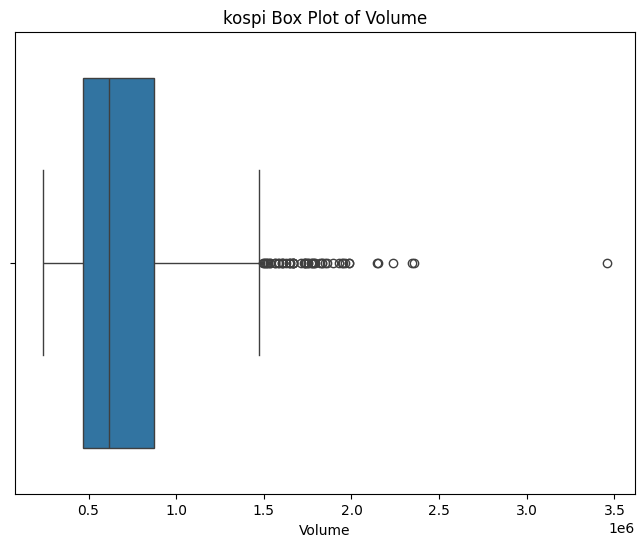

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box Plot 시각화
plt.figure(figsize=(8, 6))
sns.boxplot(x=kospi['Volume'])
plt.title("kospi Box Plot of Volume")
plt.show()


In [ ]:
# IQR 계산
Q1 = merged_snp['Volume'].quantile(0.25)
Q3 = merged_snp['Volume'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 조건
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 개수
outliers = merged_snp[(merged_snp['Volume'] < lower_bound) | (merged_snp['Volume'] > upper_bound)]
total_outliers = len(outliers)
total_data = len(merged_snp)
outlier_ratio = total_outliers / total_data

print(f"총 데이터 수: {total_data}")
print(f"이상치 수: {total_outliers}")
print(f"이상치 비율: {outlier_ratio:.2%}")


총 데이터 수: 1216
이상치 수: 88
이상치 비율: 7.24%


In [151]:
# IQR 계산
Q1 = kospi['Volume'].quantile(0.25)
Q3 = kospi['Volume'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 조건
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 개수
outliers = kospi[(kospi['Volume'] < lower_bound) | (kospi['Volume'] > upper_bound)]
total_outliers = len(outliers)
total_data = len(kospi)
outlier_ratio = total_outliers / total_data

print(f"총 데이터 수: {total_data}")
print(f"이상치 수: {total_outliers}")
print(f"이상치 비율: {outlier_ratio:.2%}")


총 데이터 수: 1187
이상치 수: 53
이상치 비율: 4.47%


In [156]:
# IQR 계산
Q1 = merged_snp['daily_change_ratio'].quantile(0.25)
Q3 = merged_snp['daily_change_ratio'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 조건
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 개수
outliers = merged_snp[(merged_snp['daily_change_ratio'] < lower_bound) | (merged_snp['daily_change_ratio'] > upper_bound)]
total_outliers = len(outliers)
total_data = len(merged_snp)
outlier_ratio = total_outliers / total_data

print(f"총 데이터 수: {total_data}")
print(f"이상치 수: {total_outliers}")
print(f"이상치 비율: {outlier_ratio:.2%}")


총 데이터 수: 1216
이상치 수: 59
이상치 비율: 4.85%


In [157]:
# IQR 계산
Q1 = kospi['daily_change_ratio'].quantile(0.25)
Q3 = kospi['daily_change_ratio'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 조건
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 개수
outliers = kospi[(kospi['daily_change_ratio'] < lower_bound) | (kospi['daily_change_ratio'] > upper_bound)]
total_outliers = len(outliers)
total_data = len(kospi)
outlier_ratio = total_outliers / total_data

print(f"총 데이터 수: {total_data}")
print(f"이상치 수: {total_outliers}")
print(f"이상치 비율: {outlier_ratio:.2%}")


총 데이터 수: 1187
이상치 수: 54
이상치 비율: 4.55%


In [158]:
kospi.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Volume_Sector,Volume_MA_5,Volume_MA_slope_5,Volume_MA_20,...,Close_MA_240,Close_MA_slope_240,RSI,RSI_Label,ud,Close_ud,daily_change_ratio,ct,Volume_Cluster,Volume_Cluster_Label
0,2020-01-02,2201.209961,2202.320068,2171.840088,2175.169922,494700,1,508520.0,-1460.0,527328.571429,...,2108.583505,0.466208,72.765366,2,-1,0,-0.011830,5.0,3,많음
1,2020-01-03,2192.580078,2203.379883,2165.389893,2176.459961,631600,2,520840.0,12320.0,525171.428571,...,2109.003880,0.420375,71.708748,2,-1,1,-0.007352,1.0,0,거래량 작음
2,2020-01-06,2154.969971,2164.419922,2149.949951,2155.070068,592700,2,525120.0,4280.0,538128.571429,...,2109.381172,0.377292,55.797677,1,1,0,0.000046,1.0,3,많음
3,2020-01-07,2166.600098,2181.620117,2164.270020,2175.540039,568200,1,540720.0,15600.0,537871.428571,...,2109.707672,0.326500,51.884056,1,1,1,0.004126,1.0,3,많음
4,2020-01-08,2156.270020,2162.320068,2137.719971,2151.310059,913800,3,640200.0,99480.0,586800.000000,...,2109.896047,0.188375,44.819132,1,-1,0,-0.002300,1.0,0,거래량 작음


In [160]:
kospi.drop(columns=['Volume_Cluster','Volume_Cluster_Label'],inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1187 non-null   object 
 1   Open                 1187 non-null   float64
 2   High                 1187 non-null   float64
 3   Low                  1187 non-null   float64
 4   Close                1187 non-null   float64
 5   Volume               1187 non-null   int64  
 6   Volume_Sector        1187 non-null   int64  
 7   Volume_MA_5          1187 non-null   float64
 8   Volume_MA_slope_5    1187 non-null   float64
 9   Volume_MA_20         1187 non-null   float64
 10  Volume_MA_slope_20   1187 non-null   float64
 11  Volume_MA_60         1187 non-null   float64
 12  Volume_MA_slope_60   1187 non-null   float64
 13  Volume_MA_240        1187 non-null   float64
 14  Volume_MA_slope_240  1187 non-null   float64
 15  Close_MA_5           1187 non-null   f

In [165]:
quantiles = kospi['daily_change_ratio'].quantile([0.25, 0.5, 0.75])

# 각 구간에 따라 Volume 값 분류 (0: 작음, 1: 조금 작음, 2: 약간 많음, 3: 많음)
def categorize_volume(ratio):
    if ratio <= quantiles[0.25]:
        return 0  # 병동율 작음
    elif ratio <= quantiles[0.5]:
        return 1  # 변동율 조금 작음
    elif ratio <= quantiles[0.75]:
        return 2  # 변동율 약간 많음
    else:
        return 3  # 변동율 많음

# 새로운 'Volume_Sector' 컬럼에 각 섹터 값 지정
kospi['ratio_change_sector'] = kospi['daily_change_ratio'].apply(categorize_volume)

In [162]:
quantiles = kospi['daily_change_ratio'].quantile([0.25, 0.5, 0.75])

In [171]:
kospi=kospi.rename(columns={'Unnamed: 0' : 'Date' })

In [172]:
kospi

,Date,Open,High,Low,Close,Volume,Volume_Sector,Volume_MA_5,Volume_MA_slope_5,Volume_MA_20,...,Close_MA_slope_60,Close_MA_240,Close_MA_slope_240,RSI,RSI_Label,ud,Close_ud,daily_change_ratio,ct,ratio_change_sector
0,2020-01-02,2201.209961,2202.320068,2171.840088,2175.169922,494700,1,508520.0,-1460.0,527328.571429,...,2.574666,2108.583505,0.466208,72.765366,2,-1,0,-0.011830,5.0,0
1,2020-01-03,2192.580078,2203.379883,2165.389893,2176.459961,631600,2,520840.0,12320.0,525171.428571,...,2.578833,2109.003880,0.420375,71.708748,2,-1,1,-0.007352,1.0,0
2,2020-01-06,2154.969971,2164.419922,2149.949951,2155.070068,592700,2,525120.0,4280.0,538128.571429,...,1.813668,2109.381172,0.377292,55.797677,1,1,0,0.000046,1.0,2
3,2020-01-07,2166.600098,2181.620117,2164.270020,2175.540039,568200,1,540720.0,15600.0,537871.428571,...,2.456500,2109.707672,0.326500,51.884056,1,1,1,0.004126,1.0,2
4,2020-01-08,2156.270020,2162.320068,2137.719971,2151.310059,913800,3,640200.0,99480.0,586800.000000,...,1.778335,2109.896047,0.188375,44.819132,1,-1,0,-0.002300,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,2024-10-24,2591.689941,2600.260010,2578.800049,2581.030029,343100,0,308940.0,2360.0,330514.285714,...,-3.221000,2636.329214,1.127000,54.016474,1,-1,0,-0.004113,1.0,1
1183,2024-10-25,2597.439941,2611.270020,2577.000000,2583.270020,462900,1,348480.0,39540.0,334128.571429,...,-2.923999,2637.601215,1.272000,52.885371,1,-1,1,-0.005455,1.0,1
1184,2024-10-28,2588.449951,2612.959961,2587.199951,2612.429932,333700,0,367080.0,18600.0,334471.428571,...,-1.637000,2638.896506,1.295291,50.458687,1,1,1,0.009264,5.0,3
1185,2024-10-29,2606.939941,2617.800049,2595.860107,2617.800049,363300,0,371080.0,4000.0,348485.714286,...,-1.901664,2640.041005,1.144500,55.506992,1,1,1,0.004166,1.0,2


In [173]:
kospi.to_csv('kosp_v1.csv',index=False)

In [175]:
snp=snp.loc['2020-01-01':]

In [176]:
snp

,Date,Open,High,Low,Close,Volume,Date_shifted,Volume_MA_5,Volume_MA_slope_5,Volume_MA_20,...,Close_MA_slope_20,Close_MA_60,Close_MA_slope_60,Close_MA_240,Close_MA_slope_240,RSI,RSI_Label,ud,Close_ud,daily_change_ratio
203,2019-10-22,3010.729980,3014.570068,2995.040039,2995.989990,3527540000,2019-10-23 00:00:00-04:00,3.280452e+09,36490000.0,3.186660e+09,...,3.674282,2944.485323,-0.416333,NaN,NaN,68.592585,1,-1,0,-0.004896
204,2019-10-23,2994.010010,3004.780029,2991.209961,3004.520020,3413600000,2019-10-24 00:00:00-04:00,3.317108e+09,36656000.0,3.308707e+09,...,5.481445,2944.340991,-0.144332,NaN,NaN,66.949501,1,1,1,0.003510
205,2019-10-24,3014.780029,3016.070068,3000.419922,3010.290039,3696510000,2019-10-25 00:00:00-04:00,3.435716e+09,118608000.0,3.358910e+09,...,2.087158,2944.839494,0.498503,NaN,NaN,62.073252,1,-1,1,-0.001489
206,2019-10-25,3003.320068,3027.389893,3001.939941,3022.550049,3379060000,2019-10-28 00:00:00-04:00,3.457734e+09,22018000.0,3.380159e+09,...,4.694301,2945.989327,1.149833,NaN,NaN,67.420956,1,1,1,0.006403
207,2019-10-28,3032.120117,3044.080078,3032.120117,3039.419922,3524970000,2019-10-29 00:00:00-04:00,3.508336e+09,50602000.0,3.440373e+09,...,5.924282,2947.778825,1.789498,NaN,NaN,84.593892,2,1,1,0.002407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,2024-10-24,5817.799805,5817.799805,5784.919922,5809.859863,3543030000,2024-10-25 00:00:00-04:00,3.439852e+09,12604000.0,3.449500e+09,...,-0.771415,5619.759985,4.792668,5212.825252,6.093791,57.020361,1,-1,1,-0.001365
1464,2024-10-25,5826.750000,5862.819824,5799.979980,5808.120117,3501280000,2024-10-28 00:00:00-04:00,3.465210e+09,25358000.0,3.454364e+09,...,-4.907157,5625.783984,6.023999,5218.628918,5.803666,65.353653,1,-1,0,-0.003197
1465,2024-10-28,5833.930176,5842.919922,5823.080078,5823.520020,3691280000,2024-10-29 00:00:00-04:00,3.522064e+09,56854000.0,3.484546e+09,...,-2.564314,5633.733317,7.949333,5224.512128,5.883209,61.118786,1,-1,1,-0.001784
1466,2024-10-29,5819.680176,5847.189941,5802.169922,5832.919922,3879100000,2024-10-30 00:00:00-04:00,3.629468e+09,107404000.0,3.556633e+09,...,-4.535714,5644.509814,10.776497,5230.083877,5.571749,56.951876,1,1,1,0.002275
